<a href="https://colab.research.google.com/github/lakhanrajpatlolla/aiml-learning/blob/master/U3W14_45_TimeSeries_BitcoinPrice_Prediction_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Learning Objectives

At the end of the experiment you will be able to :

- predict bitcoin price using Neural Network


In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="850" height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/Bitcoin_Price_Prediction_Walkthrough.mp4" type="video/mp4">
</video>
""")

### Dataset

### Description

In this Dataset, Bitcoin USD values from 1st Jan, 2017 to 15th Nov, 2019 downloaded from yahoo finance having one day resolution. It can be used to check simple time-series forecasting models.

This dataset contains 1049 rows and 7 features including Date,	Open,	High,	Low,	Close,	Adj Close and	Volume




Stock price forecasting is one of the most challenging tasks in financial decision-making because stock prices are inherently noisy and non-stationary and have been observed to have a random-walk characteristic. Accurate stock price predictions can yield significant profits and therefore econometric and statistical approaches including linear/non-linear methods.

### Domain Information

Time-series forecasting means predicting future values in time. Developing a forecasting model depends on the forecasting horizon. Very short-term forecasting would typically involve predicting the value at the next minute or hour, short-term forecasting has a horizon of days or weeks, long-term forecasting is done for months or a year or two, and we also have very-long term forecasting that could easily have a horizon of up to a few decades.

Here, we will build a simple Deep Learning based very-short-term Time-series forecaster, that will predict the stock prices of Bitcoin.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2418775" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959000490" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import re
ipython = get_ipython()

notebook= "U3W14_45_TimeSeries_BitcoinPrice_Prediction_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/bitcoin.csv")

    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa import stattools

# Keras imports
from keras.layers import Input, Dense, Dropout
from keras.models import Model

### Load the data

In [5]:
df = pd.read_csv('/content/bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.66,1003.08,958.70,998.33,998.33,147775008
1,2017-01-02,998.62,1031.39,996.70,1021.75,1021.75,222184992
2,2017-01-03,1021.60,1044.08,1021.60,1043.84,1043.84,185168000
3,2017-01-04,1044.40,1159.42,1044.40,1154.73,1154.73,344945984
4,2017-01-05,1156.73,1191.10,910.42,1013.38,1013.38,510199008


### Plotting the Time-series

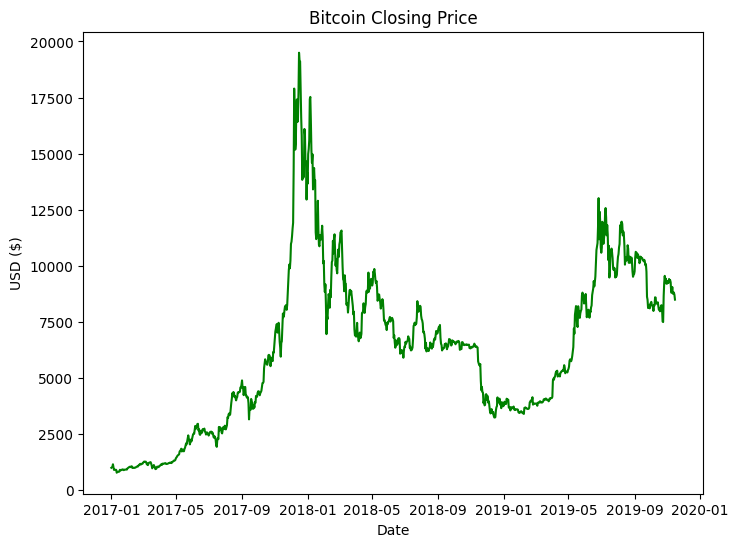

In [6]:
df_close = pd.DataFrame(df['Close'])
df_close.index = pd.to_datetime(df['Date'])

plt.figure(figsize=(8, 6))
plt.plot(df_close, color='g')
plt.title('Bitcoin Closing Price')
plt.xlabel('Date')
plt.ylabel('USD ($)')
plt.show()

### Auto Correlation Function
In autocorrelation, we take the time-series value at current instant as one variable and one of the values from a time-instant in the past as the other variable, and find the correlation between them. `stattools.acf` (acf for autocorrelation function) is used to plot the autocorrelation with 50 past time-instants (lags).

For example the ACF for a time series  is given by:

$ Corr = (y_t, y_{t-k})$

This value of k is the time gap being considered and is called the lag. A lag 1 autocorrelation (i.e., k = 1 in the above) is the correlation between values that are one time period apart. More generally, a lag k autocorrelation is the correlation between values that are k time periods apart.



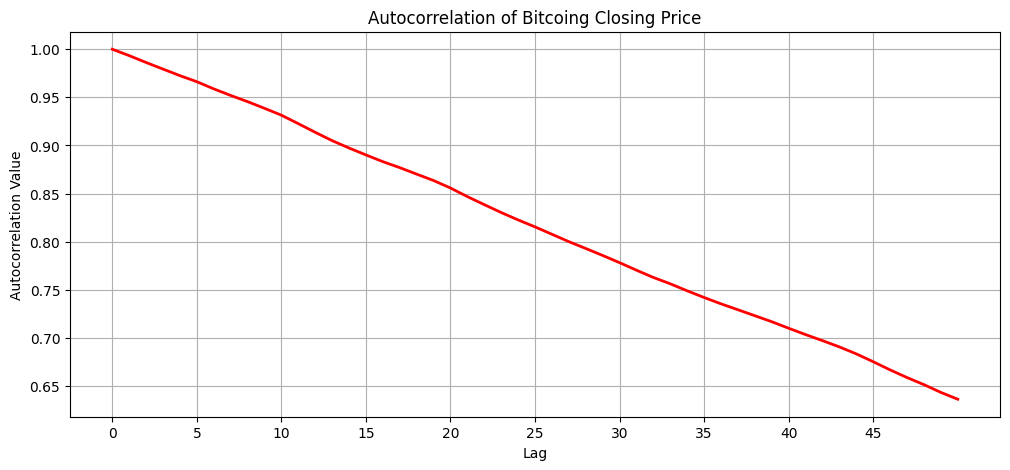

In [7]:
# YOUR CODE HERE: To create a auto correlation function with 50 lags
acf_lags = stattools.acf(df_close, nlags=50)

# YOUR CODE HERE: To plot the autocorrelation of Bitcoin Closing Price ('Lag' on X-axis, 'Autocorrelation Value' on Y-axis)
plt.figure(figsize=(12, 5))
plt.plot(acf_lags, color = 'r', linewidth =2)
plt.title('Autocorrelation of Bitcoing Closing Price')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation Value')
plt.xticks(range(0, 50, 5))
plt.grid()


plt.show()

From the above plot we can observe that, after 15 time instants (lags) the correlation value is less than 0.9, correlation is a way to measure the strength of association between any two variables. As the correlation value approaches 1, it indicates high positive association. Correlation near 0 indicates almost no association at all. So, ignore time instants (lags) having a correlation value less than 0.9

### Creation of dataset for training

Below Function to create the data with 15 lags (past 15 days of data)

In [8]:
def create_lags_data(df, attributes, list_of_prev_t_instants):

    """
    Ensure that the index is of datetime type
    Creates features with previous time instant values
    """

    start = len(list_of_prev_t_instants)
    end = len(df)
    df['datetime'] = df.index
    df.reset_index(drop=True)

    # Make a copy of original dataframe
    df_copy = df[start:end]
    df_copy.reset_index(inplace=True, drop=True)

    for attribute in attributes:
        # Create the new empty dataframe
        data = pd.DataFrame()
        for prev_t in list_of_prev_t_instants :
            # Slicing the Dataframe with 15 lags
            new_col = pd.DataFrame(df[attribute].iloc[(start - prev_t) : (end - prev_t)])
            new_col.reset_index(drop=True, inplace=True)
            # To rename the columns as Close(t-1), Close(t-2) and so on ....
            new_col.rename(columns={attribute : '{}_(t-{})'.format(attribute, prev_t)}, inplace=True)
            data = pd.concat([data, new_col], sort=False, axis=1)

        df_copy = pd.concat([df_copy, data], sort=False, axis=1)

    df_copy.set_index(['datetime'], drop=True, inplace=True)
    return df_copy

In [9]:
# Defining the Attributes and t_instances to create the lagged data
list_of_attributes = ['Close']
list_of_prev_t_instants = np.arange(1,16)
list_of_prev_t_instants

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [10]:
# Call the function to create data with 14 lags
df_new = create_lags_data(df_close, list_of_attributes, list_of_prev_t_instants)
df_new

,Close,Close_(t-1),Close_(t-2),Close_(t-3),Close_(t-4),Close_(t-5),Close_(t-6),Close_(t-7),Close_(t-8),Close_(t-9),Close_(t-10),Close_(t-11),Close_(t-12),Close_(t-13),Close_(t-14),Close_(t-15)
datetime,,,,,,,,,,,,,,,,
2017-01-16,831.53,821.80,818.41,823.98,804.83,777.76,907.68,902.83,911.20,908.59,902.20,1013.38,1154.73,1043.84,1021.75,998.33
2017-01-17,907.94,831.53,821.80,818.41,823.98,804.83,777.76,907.68,902.83,911.20,908.59,902.20,1013.38,1154.73,1043.84,1021.75
2017-01-18,886.62,907.94,831.53,821.80,818.41,823.98,804.83,777.76,907.68,902.83,911.20,908.59,902.20,1013.38,1154.73,1043.84
2017-01-19,899.07,886.62,907.94,831.53,821.80,818.41,823.98,804.83,777.76,907.68,902.83,911.20,908.59,902.20,1013.38,1154.73
2017-01-20,895.03,899.07,886.62,907.94,831.53,821.80,818.41,823.98,804.83,777.76,907.68,902.83,911.20,908.59,902.20,1013.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-11,8757.79,9055.53,8813.58,8804.88,9267.56,9360.88,9342.53,9412.61,9235.35,9324.72,9261.10,9199.58,9205.73,9427.69,9256.15,9551.71
2019-11-12,8815.66,8757.79,9055.53,8813.58,8804.88,9267.56,9360.88,9342.53,9412.61,9235.35,9324.72,9261.10,9199.58,9205.73,9427.69,9256.15
2019-11-13,8808.26,8815.66,8757.79,9055.53,8813.58,8804.88,9267.56,9360.88,9342.53,9412.61,9235.35,9324.72,9261.10,9199.58,9205.73,9427.69


### Build and compile the model

Training a simple Network that has an input layer with 15 nodes (accounting for each of the 15 past regressor inputs).

In [11]:
# YOUR CODE HERE: To define the input layer with 15 nodes
input_layer = Input(shape = (15,), dtype= 'float32')

# YOUR CODE HERE: To create the first dense layer with 30 neurons and activation as 'linear'
dense1 = Dense(30, activation= 'linear')(input_layer)
dense2 = Dense(30, activation='linear')(dense1)

# YOUR CODE HERE: To define the dropout layer with p=0.2
dropout_layer = Dropout(0.2)(dense2)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [12]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mse')

# YOUR CODE HERE: To compile the model by passing loss (MSE) and optimizer (Adam) as parameters

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,441 (5.63 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 0 (0.00 B)

### Split the data into train and test

Define the features and labels from the data and split data into train and test  in 90-10 split ratio

In [13]:
df_copy = df_new.reset_index(drop=True)

from sklearn.model_selection import train_test_split
features = df_copy.iloc[:, 1:]
labels = df_copy.iloc[:, 0]

# YOUR CODE HERE: To split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, shuffle=False)

X_train.shape, y_train.shape

print('The Shape of training inputs, training target:', X_train.shape, y_train.shape)
print('The Shape of test inputs, test target:', X_test.shape, y_test.shape)

The Shape of training inputs, training target: (930, 15) (930,)
The Shape of test inputs, test target: (104, 15) (104,)


### Scaling the data

Normalize the data before feeding it to the neural network.

In [16]:
from sklearn.preprocessing import MinMaxScaler

Target_scaler = MinMaxScaler()
Feature_scaler = MinMaxScaler()

# YOUR CODE HERE: To fit and transform the train and test data using feature scalar
X_train_scaled = Feature_scaler.fit_transform(np.array(X_train))
X_test_scaled = Feature_scaler.fit_transform(np.array(X_test))

y_train_scaled = Target_scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test_scaled = Target_scaler.fit_transform(np.array(y_test).reshape(-1,1))

### Training and Validation

In [17]:
# YOUR CODE HERE: To train and validate the model
model.fit(X_train_scaled, y_train_scaled, epochs=10, batch_size=5, shuffle=True)

Epoch 1/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0269
Epoch 2/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042
Epoch 3/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0037
Epoch 4/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0030
Epoch 5/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023
Epoch 6/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0026
Epoch 7/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019
Epoch 8/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 9/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023
Epoch 10/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022


### Making predictions on the test set

In [18]:
# YOUR CODE HERE: To get the predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [21]:
# YOUR CODE HERE: To rescale the predicted data and actual data to plot
y_pred_rescaled = Target_scaler.inverse_transform(y_pred)
y_test_rescaled = Target_scaler.inverse_transform(y_test_scaled)

### Plotting the predictions

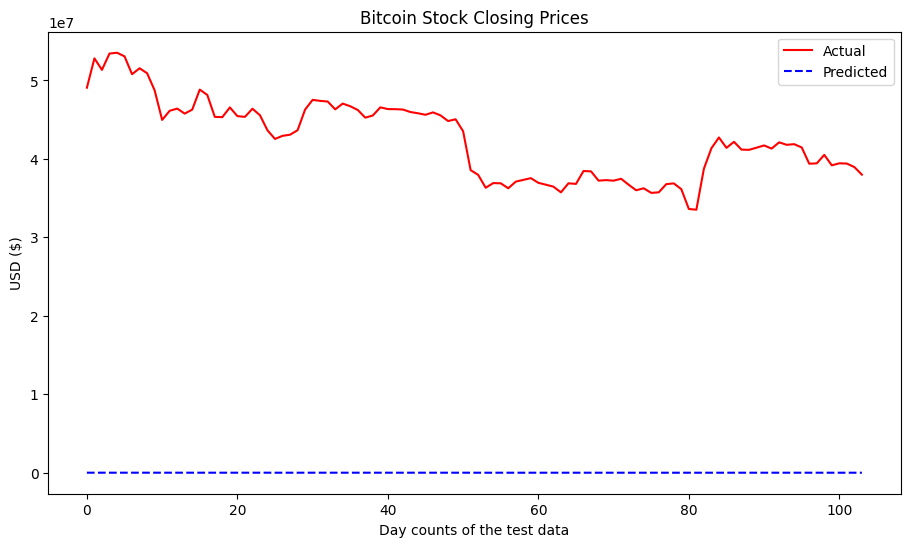

In [22]:
plt.figure(figsize=(11, 6))
plt.plot(y_test_rescaled, linestyle='solid', color='r')
plt.plot(y_pred_rescaled, linestyle='dashed', color='b')

plt.legend(['Actual','Predicted'])
plt.title('Bitcoin Stock Closing Prices')
plt.ylabel('USD ($)')
plt.xlabel('Day counts of the test data')

plt.show()

### Please answer the questions below to complete the experiment:




In [23]:
#@title State True or False: A time series autocorrelation plot refers to the degree of correlation between the values of the same variables across different observations in the data { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "TRUE" #@param ["","TRUE", "FALSE"]

In [24]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [25]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "good" #@param {type:"string"}


In [26]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [27]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [28]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [29]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [30]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1917
Date of submission:  22 Feb 2025
Time of submission:  15:47:00
View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions
